<a href="https://colab.research.google.com/github/parkmicheal1114/Python_Quest/blob/main/MainQuest/MainQuest03_%EA%B0%80%EC%9C%84%EB%B0%94%EC%9C%84%EB%B3%B4_AIFFEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.12.0
1.22.4


In [2]:
# import
from PIL import Image
import glob
import os

 - ref : https://wikidocs.net/83


In [3]:
# image resize
def resize_images(img_path):
  images = glob.glob(img_path +"/*.jpg")

  print(len(images),"Image to be resizes")
  # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
  target_size = (150,150)
  for img in images:
    old_img = Image.open(img)
    new_img = old_img.resize(target_size , Image.ANTIALIAS)
    new_img.save(img,'JPEG')

  print(len(images) , "images resized.")

In [4]:
folders = ['scissor' ,'rock','paper']

for folder in folders:
  img_path = '/content/drive/MyDrive/Colab Notebooks/aiffel/rock_scissor_paper/'+folder
  resize_images(img_path)
  print(f'{folder} 이미지 resize 완료')


714 Image to be resizes
714 images resized.
scissor 이미지 resize 완료
773 Image to be resizes
773 images resized.
rock 이미지 resize 완료
730 Image to be resizes
730 images resized.
paper 이미지 resize 완료


In [5]:
import numpy as np

def load_data(img_path , number_of_data=2217):
  # 가위 : 0 , 바위: 1 , 보: 2
  img_size = 150
  color = 3
  # 이미지 데이터와 라벨 (가위:0 , 바위:1 , 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성 합니다.
  imgs = np.zeros(number_of_data*img_size*img_size*color , dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
  labels = np.zeros(number_of_data , dtype = np.int32)

  idx = 0
  for file in glob.iglob(img_path + '/scissor/*.jpg'):
    img = np.array(Image.open(file),dtype=np.int32)
    imgs[idx,:,:,:]=img # 데이터 영역에 이미지 행렬을 복사
    labels[idx] = 0
    idx = idx+1

  for file in glob.iglob(img_path+'/rock/*.jpg'):
      img = np.array(Image.open(file),dtype=np.int32)
      imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
      labels[idx]=1   # 바위 : 1
      idx=idx+1

  for file in glob.iglob(img_path+'/paper/*.jpg'):
      img = np.array(Image.open(file),dtype=np.int32)
      imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
      labels[idx]=2   # 보 : 2
      idx=idx+1

  print('학습데이터(x_train)의 이미지 개수는',idx , '입니다')
  return imgs , labels




In [6]:
image_dir_path = "/content/drive/MyDrive/Colab Notebooks/aiffel/rock_scissor_paper"
(x_train , y_train) = load_data(image_dir_path)

학습데이터(x_train)의 이미지 개수는 2217 입니다


In [7]:
x_train_norm = x_train/255.0 # 정규화

In [8]:
print(f'x_train shape : {x_train.shape}')
print(f'y_train shape : {y_train.shape}')

x_train shape : (2217, 150, 150, 3)
y_train shape : (2217,)


라벨 2


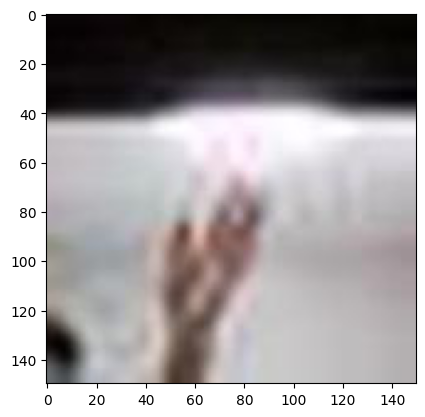

In [9]:
import matplotlib.pyplot as plt

i = np.random.randint(2000)
plt.imshow(x_train[i])
print('라벨',y_train[i])

In [10]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import BatchNormalization

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(BatchNormalization())
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu')) # 복잡한 문제 일수록 이 수를 늘려 보자.
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))
model.summary()

Model에 추가된 Layer 개수:  14
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 148, 148, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 dropout (Dropout)           (None, 72, 72, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (

In [11]:
# compile
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [12]:
# 모델 훈련
model.fit(x_train_norm, y_train, epochs=20)

Epoch 1/20
70/70 [==============================] - 16s 30ms/step - loss: 2.5086 - accuracy: 0.7871
Epoch 2/20
70/70 [==============================] - 2s 26ms/step - loss: 0.1647 - accuracy: 0.9427
Epoch 3/20
70/70 [==============================] - 2s 26ms/step - loss: 0.0776 - accuracy: 0.9720
Epoch 4/20
70/70 [==============================] - 2s 27ms/step - loss: 0.0473 - accuracy: 0.9811
Epoch 5/20
70/70 [==============================] - 2s 30ms/step - loss: 0.0272 - accuracy: 0.9923
Epoch 6/20
70/70 [==============================] - 2s 27ms/step - loss: 0.0441 - accuracy: 0.9842
Epoch 7/20
70/70 [==============================] - 2s 27ms/step - loss: 0.0259 - accuracy: 0.9923
Epoch 8/20
70/70 [==============================] - 2s 27ms/step - loss: 0.0105 - accuracy: 0.9959
Epoch 9/20
70/70 [==============================] - 2s 27ms/step - loss: 0.0756 - accuracy: 0.9820
Epoch 10/20
70/70 [==============================] - 2s 27ms/step - loss: 0.0713 - accuracy: 0.9783
Epoch 11

# test 파일

In [13]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path ="/content/drive/MyDrive/Colab Notebooks/aiffel/rock_paper_scissors_test/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100 Image to be resizes
100 images resized.
가위 이미지 resize 완료!


In [14]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path ="/content/drive/MyDrive/Colab Notebooks/aiffel/rock_paper_scissors_test/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100 Image to be resizes
100 images resized.
보 이미지 resize 완료!


In [15]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path ="/content/drive/MyDrive/Colab Notebooks/aiffel/rock_paper_scissors_test/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

100 Image to be resizes
100 images resized.
바위 이미지 resize 완료!


In [16]:
image_dir_path = "/content/drive/MyDrive/Colab Notebooks/aiffel/rock_paper_scissors_test"
(x_test , y_test) = load_data(image_dir_path,number_of_data=300)

학습데이터(x_train)의 이미지 개수는 300 입니다


In [17]:
x_test_norm = x_test/255.0 # 정규화

In [18]:
print(f'x_test shape : {x_test.shape}')
print(f'y_test shape : {y_test.shape}')

x_test shape : (300, 150, 150, 3)
y_test shape : (300,)


In [19]:
# testset 검증
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 15.7168 - accuracy: 0.4067 - 385ms/epoch - 39ms/step
test_loss: 15.716803550720215
test_accuracy: 0.40666666626930237


 - test dataset 검증에서 accuracy 0.38 로 낮게 나와서 , 데이터  augmentation 방법을 활용해 보았다. 학습 이미지의 배경도 각기 다르고 , 제대로 feature 추출이 안되는 느낌이 많이 들어서 시도해 보았다.

 - 학습데이터 수집에 한계가 명확한 것 같다.

#Data augmentation

In [20]:
# Try1
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range= 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=True)  # randomly flip images


datagen.fit(x_train_norm)

데이터 증강(Data Augmentation)을 위해 다음과 같은 변형을 선택했습니다:

- 일부 훈련 이미지를 무작위로 30도 회전시킵니다.
- 일부 훈련 이미지를 무작위로 20% 확대/축소합니다.
- 이미지를 가로로 20%만큼 무작위로 이동시킵니다.
- 이미지를 세로로 20%만큼 무작위로 이동시킵니다.
- 수평 뒤집기만 만 사용. ( 학습데이터에 왼손과 오른손 둘다 확인 되었음 )


In [21]:
history = model.fit(datagen.flow(x_train_norm,y_train, batch_size = 60) ,epochs = 60 )

Epoch 1/60
37/37 [==============================] - 11s 267ms/step - loss: 3.2848 - accuracy: 0.4069
Epoch 2/60
37/37 [==============================] - 10s 261ms/step - loss: 1.0107 - accuracy: 0.4308
Epoch 3/60
37/37 [==============================] - 10s 259ms/step - loss: 0.9330 - accuracy: 0.5097
Epoch 4/60
37/37 [==============================] - 10s 269ms/step - loss: 0.8909 - accuracy: 0.5480
Epoch 5/60
37/37 [==============================] - 10s 265ms/step - loss: 0.8674 - accuracy: 0.5498
Epoch 6/60
37/37 [==============================] - 10s 265ms/step - loss: 0.8320 - accuracy: 0.5719
Epoch 7/60
37/37 [==============================] - 10s 262ms/step - loss: 0.8165 - accuracy: 0.5841
Epoch 8/60
37/37 [==============================] - 10s 257ms/step - loss: 0.8114 - accuracy: 0.5940
Epoch 9/60
37/37 [==============================] - 10s 257ms/step - loss: 0.7831 - accuracy: 0.6103
Epoch 10/60
37/37 [==============================] - 10s 258ms/step - loss: 0.7219 - accura

In [22]:
# test set 검증
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 3.3190 - accuracy: 0.3300 - 101ms/epoch - 10ms/step
test_loss: 3.3189873695373535
test_accuracy: 0.33000001311302185


In [23]:
def plot_accuracy_loss(history):
  fig = plt.figure(figsize = (10,8))
  # accuracy plot
  plt.plot(history.history['accuracy'],'bo--',label = 'acc')
  plt.plot(history.history['loss'],'ro--' , label= 'loss')
  plt.title('train_acc vs train_loss')
  plt.ylabel('accuracy')
  plt.xlabel('epochs')
  plt.legend()

  # # loss plot
  # plt.subplot(222)
  # plt.plot(history.history['loss'],'bo--', label = "loss")
  # plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
  # plt.title("train_loss vs val_loss")
  # plt.ylabel("loss")
  # plt.xlabel("epochs")

  plt.legend()
  plt.show()

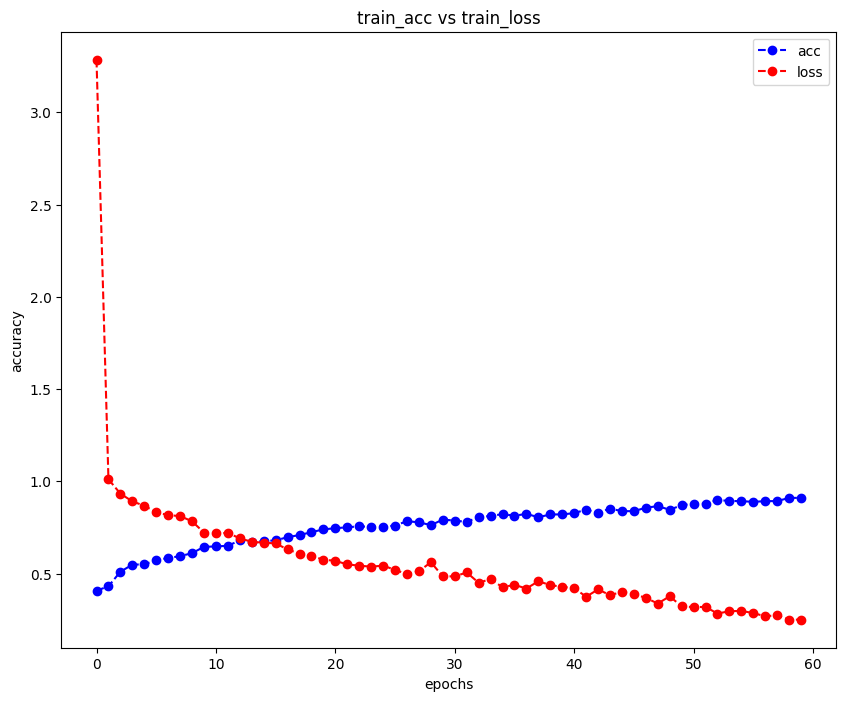

In [24]:
plot_accuracy_loss(history)

In [25]:
#try 12
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range= 10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=True)  # randomly flip images


datagen.fit(x_train_norm)

데이터 증강(Data Augmentation)을 위해 다음과 같은 변형을 선택했습니다:

- 일부 훈련 이미지를 무작위로 10도 회전시킵니다.
- 일부 훈련 이미지를 무작위로 10% 확대/축소합니다.
- 이미지를 가로로 10%만큼 무작위로 이동시킵니다.
- 이미지를 세로로 10%만큼 무작위로 이동시킵니다.
- 수평 뒤집기만 만 사용. ( 학습데이터에 왼손과 오른손 둘다 확인 되었음 )

In [26]:
history = model.fit(datagen.flow(x_train_norm,y_train, batch_size = 60) ,epochs = 10 )

Epoch 1/10
37/37 [==============================] - 9s 251ms/step - loss: 0.1518 - accuracy: 0.9463
Epoch 2/10
37/37 [==============================] - 9s 253ms/step - loss: 0.1411 - accuracy: 0.9526
Epoch 3/10
37/37 [==============================] - 10s 255ms/step - loss: 0.1133 - accuracy: 0.9612
Epoch 4/10
37/37 [==============================] - 9s 251ms/step - loss: 0.1226 - accuracy: 0.9558
Epoch 5/10
37/37 [==============================] - 9s 248ms/step - loss: 0.1143 - accuracy: 0.9576
Epoch 6/10
37/37 [==============================] - 10s 256ms/step - loss: 0.1131 - accuracy: 0.9590
Epoch 7/10
37/37 [==============================] - 10s 255ms/step - loss: 0.1087 - accuracy: 0.9653
Epoch 8/10
37/37 [==============================] - 9s 253ms/step - loss: 0.0837 - accuracy: 0.9711
Epoch 9/10
37/37 [==============================] - 9s 246ms/step - loss: 0.0986 - accuracy: 0.9648
Epoch 10/10
37/37 [==============================] - 10s 256ms/step - loss: 0.0955 - accuracy: 0.

In [27]:
# test set 검증
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 2.7691 - accuracy: 0.4300 - 98ms/epoch - 10ms/step
test_loss: 2.7691004276275635
test_accuracy: 0.4300000071525574


In [28]:
# Try3
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range= 5,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.05, # Randomly zoom image
        width_shift_range=0.05,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.05,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=True)  # randomly flip images


datagen.fit(x_train_norm)

데이터 증강(Data Augmentation)을 위해 다음과 같은 변형을 선택했습니다:

- 일부 훈련 이미지를 무작위로 5도 회전시킵니다.
- 일부 훈련 이미지를 무작위로 5% 확대/축소합니다.
- 이미지를 가로로 5%만큼 무작위로 이동시킵니다.
- 이미지를 세로로 5%만큼 무작위로 이동시킵니다.
- 수평 뒤집기만 만 사용. ( 학습데이터에 왼손과 오른손 둘다 확인 되었음 )

In [29]:
history = model.fit(datagen.flow(x_train_norm,y_train, batch_size = 60) ,epochs = 10 )

Epoch 1/10
37/37 [==============================] - 9s 251ms/step - loss: 0.0590 - accuracy: 0.9793
Epoch 2/10
37/37 [==============================] - 9s 245ms/step - loss: 0.0597 - accuracy: 0.9783
Epoch 3/10
37/37 [==============================] - 9s 244ms/step - loss: 0.0418 - accuracy: 0.9860
Epoch 4/10
37/37 [==============================] - 9s 245ms/step - loss: 0.0419 - accuracy: 0.9869
Epoch 5/10
37/37 [==============================] - 9s 246ms/step - loss: 0.0643 - accuracy: 0.9797
Epoch 6/10
37/37 [==============================] - 9s 247ms/step - loss: 0.0519 - accuracy: 0.9802
Epoch 7/10
37/37 [==============================] - 9s 245ms/step - loss: 0.0564 - accuracy: 0.9824
Epoch 8/10
37/37 [==============================] - 9s 247ms/step - loss: 0.0461 - accuracy: 0.9820
Epoch 9/10
37/37 [==============================] - 9s 245ms/step - loss: 0.0449 - accuracy: 0.9874
Epoch 10/10
37/37 [==============================] - 9s 251ms/step - loss: 0.0290 - accuracy: 0.9905

In [34]:
# test set 검증
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 2.8050 - accuracy: 0.3800 - 98ms/epoch - 10ms/step
test_loss: 2.8050425052642822
test_accuracy: 0.3799999952316284


 - 여러번 시도 했지만 , try 1~ 3 까지 진행하면서 try 2에서 testset 검증이 가장 좋은 결과가 나왔다.
 - try2 에서 검증한 정확도가 43% 인데 , 데이터 증강을 하지 않은 상태에서도 40% 정도 나온 것을 봐서는 좋은 결과는 아닌 것 같다. 하지만 삭제되어 보이지는 않지만 중간에 50% 까지도 결과가 나온적이 있어서 테스트를 진행 하게 되었다.




In [39]:
predicted_result = model.predict(x_test_norm) # model 이 추론한 확률값
predicted_labels = np.argmax(predicted_result , axis =1)

idx = np.random.randint(300)
print('model.predict 결과 : ' , predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ' , predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

10/10 [==============================] - 0s 7ms/step
model.predict 결과 :  [3.5985051e-06 4.7070179e-09 9.9999642e-01]
model이 추론한 가장 가능성이 높은 결과 :  2
실제 데이터의 라벨 :  2


예측 확률 분포 : [1.4548045e-06 9.4587815e-10 9.9999857e-01]
라벨1 , 예측결과 : 2


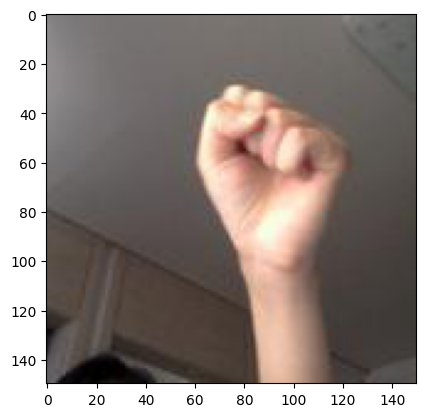

예측 확률 분포 : [0.05163286 0.00301859 0.94534856]
라벨0 , 예측결과 : 2


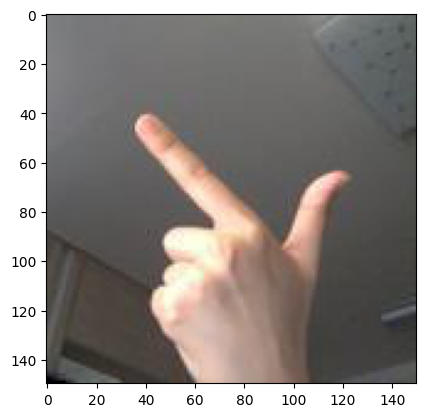

예측 확률 분포 : [2.1044932e-02 6.4200704e-04 9.7831309e-01]
라벨0 , 예측결과 : 2


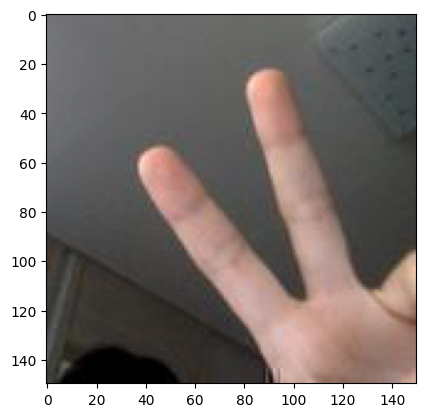

예측 확률 분포 : [1.7970186e-05 3.6353899e-06 9.9997842e-01]
라벨1 , 예측결과 : 2


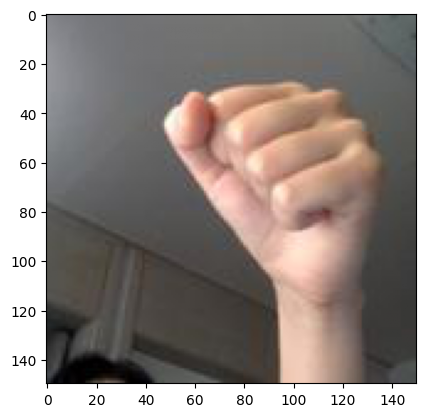

예측 확률 분포 : [0.25390735 0.01002151 0.7360711 ]
라벨0 , 예측결과 : 2


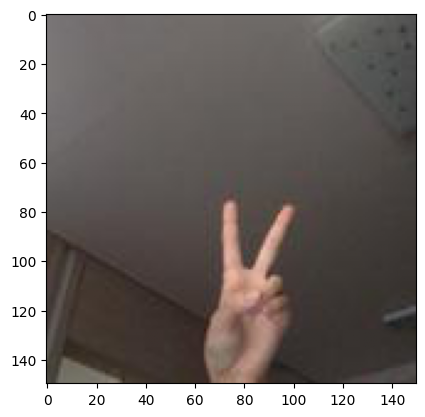

In [40]:
import random
wrong_predict_list = []

for i , _ in enumerate(predicted_labels):
  if predicted_labels[i] != y_test[i]:
    wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덥하게 5개만 뽑아 봅시다.

samples = random.choices(population = wrong_predict_list , k = 5)

for n in samples:
  print("예측 확률 분포 : " + str(predicted_result[n]))
  print("라벨" + str(y_test[n]) + " , 예측결과 : " + str(predicted_labels[n]))
  plt.imshow(x_test_norm[n] , cmap = plt.cm.binary)
  plt.show()

 # Conclution
  - train 데이터 : 총 7명의 데이터 ( class total :  2217 개 )
  - test 데이터 : train data 에 포함 되지 않은 1명의 데이터 ( class total : 100개 )
  - train 데이터의 손모양 , 배경등이 너무 제각각 이었고 , 그에 비해서 수집된 데이터 양은 작은게 아닌가 하는 의심이 들었다.
  - 1번째 시도
    - 레이어의 개수와 필터의 개수에 변화를 주었다.더 깊게 , 더 많이.
    - 하지만 Overfitting 이 되면서 오히려 test data에 대한 정확도는 떨어지는 결과가 나왔다.
  - 2번째 시도
    - Overfitting 을 방지 하기 위해서 drop_out 을 적용 시켰다.
    - test data 에 대한 정확도는 조금 변화가 있었지만 . 더 나아지지는 않았다.
  - 3번째 시도
    - train data의 문제라고 판단되어서 data 증강 기법을 사용해서 여러 변수를 적용 시켰다.
    - 1,2번째 시도에 비해서 2배 정도 정확도가 올라 갔지만 , 그래도 35% 대 정도 나온다.
  - 4번째 시도
    - Overfitting 되는 문제가 정확하지는 않지만 어떤 요인에 의해서 편향 되는 것이 아닌가 생각 되어서 Batch 정규화도 적용 해 보았다.
    - model의 정확도가 개선 되는 속도가 매우 느려서 epoch을 80 까지 주고 학습을 진행 중이다.
    - 현재 학습 정확도는 89% 정도에서 머물고 있지만 조금씩 loss가 낮아 지고 있다.

  - 현재 가위와 보자기를 주로 틀리고 있는 듯 하다. 그러니 40% 정도 선이 아닐까 싶다.

  - 데이터 증강을 통해서 조금씩 나아지는 경우도 있었지만 , 잠시 나왔던 검증셋에서의 50%라는 정확도는 재현이 안되는 우연이라고 생각하니 편해졌다.

  - 재현 되는 정확도는 40~43% 정도 나오며 , 더 이상 모델을 가지고 진행 하는 것은 무의미 할 듯 하다.

  - 개인적인 생각이지만 , 데이터 수집시 배경, 손모양 , 손의 위치 등에 대해서 가이드를 주고 수집 했더라면 , 조금 더 좋은 결과가 나오지 않았을까 생각한다.

  - 테스트 데이터 셋은 훈련 데이터 셋 보다는 조금 느슨한 조건 으로 수집 하면 좋을 것 같다.

  - 데이터 수집과 준비의 중요성이 새삼 느낄 수 있었던 프로젝트 였던 듯 하다.~